### 1. Load The Data

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
%matplotlib inline

In [9]:
# load the data
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
# Check Values of Target 
iris.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

### 2. Problem 

##### In This Dataset
- No of Target = 1
- Target Cordinality >2 
- Type Of Target is Multi Class

###  * This is Multi Class Classification Problem

### 3. Exploratory Data Analysis

In [11]:
# All columns in dataset
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [12]:
# Shape of data
iris.shape

(150, 5)

In [13]:
# Information of data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [14]:
# Check NaN Values
np.nan == True

False

In [15]:
# Calculating NaN Values
iris.isnull().sum().sum()

0

In [16]:
# Check duplicate values
iris.duplicated == True

False

In [17]:
# calculating duplicate values
iris.duplicated().sum()

3

In [18]:
# Some Values for iris Dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 4. Identifing Variables
- target is Dependent Varible and rest all are independent variable

### 5. Data Visualization

##### 5.1. Check Correlation Matrix with Heatmap :


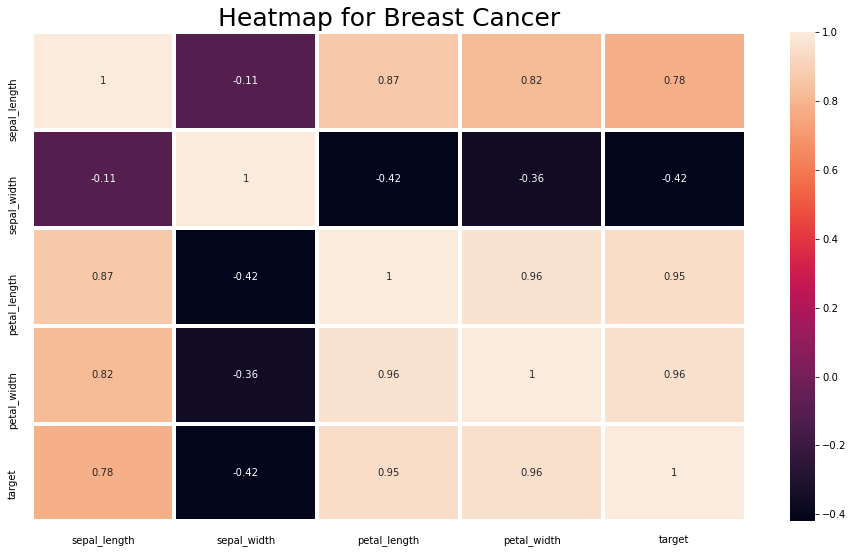

In [19]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(iris.corr(), annot=True, linewidths=3)
ax.tick_params(size = 10, color = 'w', labelsize = 10, labelcolor = 'k')
plt.title("Heatmap for Breast Cancer", fontsize = 25)
plt.show()

- With the help of this Heatmap we can say that petal_length, petal_width, sepal_length are highly correlated with target where as sepal_width is less correlated with target

##### 5.2. Visualiziation

F:\Anaconda\anaconda setup\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


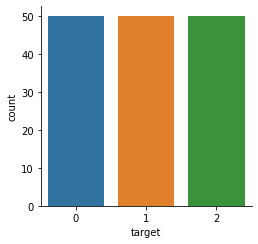

In [20]:
# Checking values for target
sns.catplot('target',data=iris,kind='count',size = 3.5)

- Dataset is Balanced

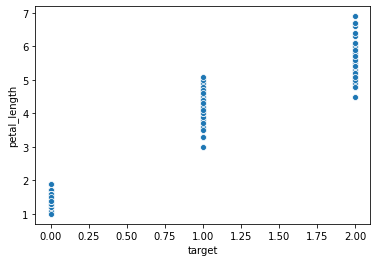

In [21]:
sns.scatterplot(x = "target", y = 'petal_length', data = iris)

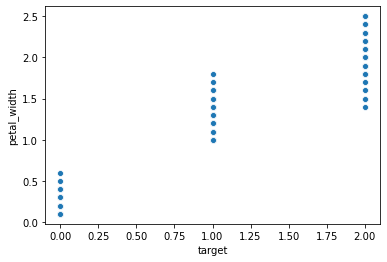

In [22]:
sns.scatterplot(x = "target", y = 'petal_width', data = iris)

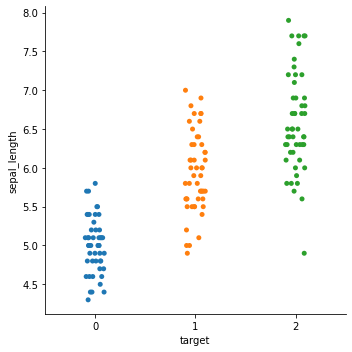

In [23]:
sns.catplot(x = "target", y = 'sepal_length', data = iris)

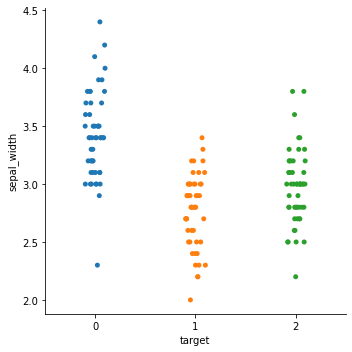

In [24]:
sns.catplot(x = "target", y = 'sepal_width', data = iris)

### 6. Data Cleaning and Preprocessing 

##### 6.1. Remove Unwanted Columns like ID, Columns which Most of Values is Missing

- No need for Removing Unwanted Columns Because They are't Present

##### 6.2. Impute Missing Values

- No need for Imputation of Missing Values Becouse Missing or NaN Value aren't Present in Dataset

##### 6.3. Impuating missing values for categorical feature

In [25]:
# check impuation for categorical variable
data_cat = iris.select_dtypes(include='object')
data_cat.head()

""
0
1
2
3
4


- No Categorical features are Present in Dataset

##### 6.4. Replacing NaN values

- No need for Replacing NaN Values With Mean Because NaN Values aren't Present

##### 6.5. Check Outlier

In [26]:
# Numerical features in data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_data = iris.select_dtypes(include=numerics)
num_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
# Calculating Z_score
num_data = num_data.iloc[:,:-1]
z_score=np.abs(stats.zscore(num_data))
z_score

array([[9.00681170e-01, 1.03205722e+00, 1.34127240e+00, 1.31297673e+00],
       [1.14301691e+00, 1.24957601e-01, 1.34127240e+00, 1.31297673e+00],
       [1.38535265e+00, 3.37848329e-01, 1.39813811e+00, 1.31297673e+00],
       [1.50652052e+00, 1.06445364e-01, 1.28440670e+00, 1.31297673e+00],
       [1.02184904e+00, 1.26346019e+00, 1.34127240e+00, 1.31297673e+00],
       [5.37177559e-01, 1.95766909e+00, 1.17067529e+00, 1.05003079e+00],
       [1.50652052e+00, 8.00654259e-01, 1.34127240e+00, 1.18150376e+00],
       [1.02184904e+00, 8.00654259e-01, 1.28440670e+00, 1.31297673e+00],
       [1.74885626e+00, 3.56360566e-01, 1.34127240e+00, 1.31297673e+00],
       [1.14301691e+00, 1.06445364e-01, 1.28440670e+00, 1.44444970e+00],
       [5.37177559e-01, 1.49486315e+00, 1.28440670e+00, 1.31297673e+00],
       [1.26418478e+00, 8.00654259e-01, 1.22754100e+00, 1.31297673e+00],
       [1.26418478e+00, 1.24957601e-01, 1.34127240e+00, 1.44444970e+00],
       [1.87002413e+00, 1.24957601e-01, 1.51186952e

In [28]:
# Set threshold
threshold=3

In [29]:
# Detecting Outliers
out= np.where(z_score > threshold)
out

(array([15], dtype=int64), array([1], dtype=int64))

In [30]:
iris.sepal_length.value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal_length, dtype: int64

##### Method 1 for removing outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1cab7883ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cab78931c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cab7883760>],
 'medians': [<matplotlib.lines.Line2D at 0x1cab7893880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cab7893b80>],
 'means': []}

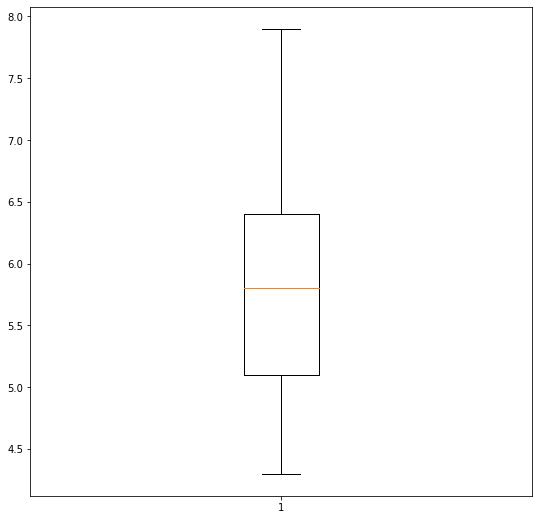

In [31]:
plt.figure(figsize=(9,9))
plt.boxplot(num_data['sepal_length']) #boxplot without circles indicate no outliers

In [32]:
Q1,Q3 = np.percentile(num_data["sepal_length"],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
nt_chr = num_data["sepal_length"].mean()
print("Mean Value of sepal_length Feature = ",nt_chr)

Q1 =  5.1
Q2 =  6.4
IQR =  1.3000000000000007
Lower Bound =  3.1499999999999986
Upper Bound =  8.350000000000001
Mean Value of sepal_length Feature =  5.843333333333335


In [33]:
num_data["sepal_length"] = np.where(num_data["sepal_length"] < 3.14, 5.843333,num_data['sepal_length'])
num_data["sepal_length"] = np.where(num_data["sepal_length"] > 8.35, 5.843333,num_data['sepal_length'])

In [34]:
print(num_data["sepal_length"].skew())

0.3149109566369728


##### Method 2 for removing outliers

In [35]:
num_data.iloc[14:15,0:1]

,sepal_length
14,5.8


In [36]:
num_data["sepal_length"] = np.where(num_data["sepal_length"] == 5.8, 5.843333,num_data['sepal_length'])

##### Method 3 for removing outliers

In [37]:
# Create dataframe for Outliers 
outlier = pd.DataFrame(out).T
outlier.columns = ['Row','Column']
outlier

,Row,Column
0,15,1


In [38]:
# columns in ins_data which contains outliers
outlier.Column.value_counts()

1    1
Name: Column, dtype: int64

In [39]:
num_data.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

##### Columns Contains Outliers
- 1 sepal_length    

In [40]:
# Check Z score and Outlier values for 'sepal_length'
print(num_data.sepal_length.mean())
print(num_data.sepal_length.std())

5.845355540000003
0.8280103729974668


In [41]:
sepal = [5.0,6.3,5.1,6.7,5.7,5.5,5.8,6.4,6.0,4.9,6.1,5.4,5.6,6.5,4.8,7.7,6.9,5.2,6.2,4.6,7.2,6.8,4.4,5.9,6.6,4.7,7.6,7.4,4.3,7.9,7.3,7.0,4.5,5.3,7.1]
sepal_outlier = []
for i in sepal:
    z = (i-5.843333333333335)/0.8280661279778629
    print(z)
    if (z>3 or -(1*z)>3):
        sepal_outlier.append(i)
print(sepal_outlier)

-1.0184371813308608
0.5514857464123608
-0.8976738791967672
1.0345389549487372
-0.1730940663922027
-0.4146206706603909
-0.05233076425810914
0.6722490485464554
0.18919584001007905
-1.1392004834649543
0.3099591421441726
-0.5353839727944845
-0.29385736852629735
0.793012350680549
-1.259963785599049
2.242171976289677
1.2760655592169254
-0.7769105770626726
0.4307224442782672
-1.5014903898672372
1.6383554656192072
1.1553022570828306
-1.7430169941354243
0.0684325378759855
0.9137756528146426
-1.3807270877331426
2.121408674155582
1.8798820698873953
-1.863780296269519
2.4836985805578653
1.7591187677533007
1.396828861351019
-1.6222536920013308
-0.656147274928579
1.5175921634851124
[]


In [42]:
num_data["sepal_length"] = np.where(num_data["sepal_length"] == 5.8, 5.843333,num_data['sepal_length'])

In [43]:
#sucessfully handled outliers
print(num_data.iloc[14,0])

5.843333


In [44]:
df = iris.target
frame = [num_data,df]
iris_data = pd.concat(frame, axis=1)
iris_data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##### 6.6. Feature Engg

##### 6.6.1. Feature Selection

##### 6.6.1.1. Check Correlation Matrix

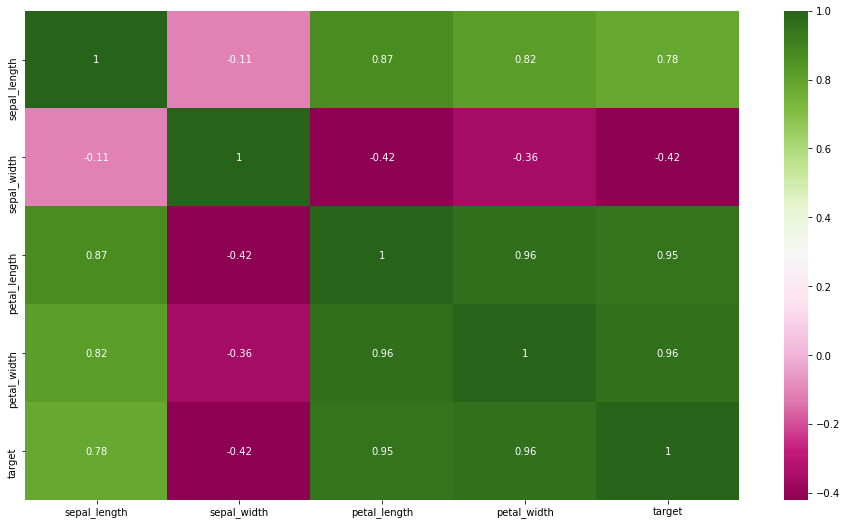

In [45]:
#pearson correlation
corr = iris_data.corr(method='pearson')
top_corr_features = corr.index
plt.figure(figsize=(16,9))
#plot heat map
g=sns.heatmap(iris_data[top_corr_features].corr(),annot=True,cmap="PiYG")

##### 6.6.1.2. Feature importance :
- Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using
  Extra Tree Classifier for extracting the top 10 features for the dataset.


In [46]:
X = iris_data.iloc[:,:-1]  #independent columns
y = iris_data["target"]    #target column 

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

[0.0830798  0.05539031 0.40312459 0.4584053 ]


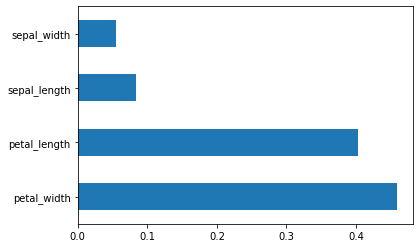

In [47]:
# for h1n1_vaccine
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

##### 6.6.1.3. Removing Less Correlated Features

In [48]:
# remove less correlated features
iris_data.drop(['sepal_width'],
          axis=1,inplace = True)

##### 6.6.2. Feature Scaling

##### 6.6.2.1 Check Distribution

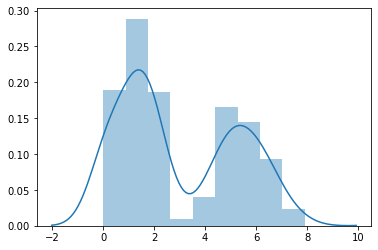

In [49]:
# seaborn plot for dataset
sns.distplot(iris_data)

In [50]:
#skewness for dataset
skewness = stats.skew(iris_data)
skewness

array([ 0.30447149, -0.27171195, -0.10394367,  0.        ])

In [51]:

#kurtosis for dataset
kurtosis = stats.kurtosis(iris_data)
kurtosis

array([-0.57593506, -1.3953593 , -1.33524564, -1.5       ])

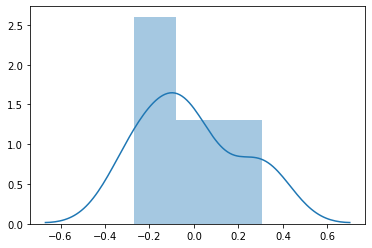

In [52]:
# seaborn plot for skewness for dataset 
sns.distplot(skewness)

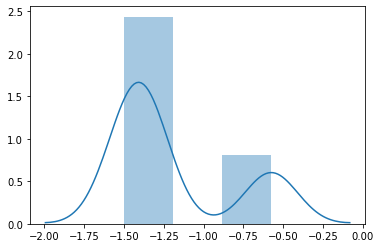

In [53]:
# seaborn plot for kurtosis for dataset 
sns.distplot(kurtosis)

##### 6.6.2.2. Format the Data (Normalization and Standadization)

- Dataset is Normalized that's why No need of Normalization and Standadization

##### 6.7. Handle Imbalance Data 

- Dataset is already Balanced

### 7. Model Selection and Building 

##### 7.1 Defining X and y

In [54]:
X = iris_data.iloc[:,:-1]
y = iris_data.target

In [55]:
X

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [56]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

##### 7.2 Splitting the Data

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [58]:
X_train

,sepal_length,petal_length,petal_width
32,5.2,1.5,0.1
52,6.9,4.9,1.5
70,5.9,4.8,1.8
121,5.6,4.9,2.0
144,6.7,5.7,2.5
...,...,...,...
113,5.7,5.0,2.0
64,5.6,3.6,1.3
15,5.7,1.5,0.4
125,7.2,6.0,1.8


In [59]:
X_test

,sepal_length,petal_length,petal_width
87,6.300000,4.4,1.3
111,6.400000,5.3,1.9
10,5.400000,1.5,0.2
91,6.100000,4.6,1.4
49,5.000000,1.4,0.2
60,5.000000,3.5,1.0
72,6.300000,4.9,1.5
67,5.843333,4.1,1.0
39,5.100000,1.5,0.2
55,5.700000,4.5,1.3


In [60]:
y_train

32     0
52     1
70     1
121    2
144    2
      ..
113    2
64     1
15     0
125    2
9      0
Name: target, Length: 105, dtype: int64

In [61]:
y_test

87     1
111    2
10     0
91     1
49     0
60     1
72     1
67     1
39     0
55     1
66     1
142    2
53     1
1      0
19     0
112    2
85     1
38     0
21     0
35     0
102    2
132    2
126    2
24     0
61     1
2      0
95     1
90     1
76     1
117    2
58     1
97     1
129    2
114    2
146    2
47     0
124    2
120    2
118    2
141    2
26     0
43     0
59     1
41     0
56     1
Name: target, dtype: int64

In [62]:
# shape of train test data
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train_h1n1 shape", y_train.shape)
print("y_test_h1n1 shape", y_test.shape)

X_train shape (105, 3)
X_test shape (45, 3)
y_train_h1n1 shape (105,)
y_test_h1n1 shape (45,)


##### 7.3 Select Model Which is Shoutable for our Project

- Apply Different Different Algorithms and Select Best for model
- Let KNN is best here

### 8. Creating and Training the Model

##### 8.1. Hyperparameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [64]:
#Choosing a K Value in KNN for target:
error_rate = [] 
for i in range(1, 40): 
      
    knn_err = KNeighborsClassifier(n_neighbors = i) 
    knn_err.fit(X_train, y_train) 
    knn_err.score(X_train,y_train)
    predict_i = knn_err.predict(X_test) 
    error_rate.append(np.mean(predict_i != y_test)) 
  

Text(0, 0.5, 'Error Rate')

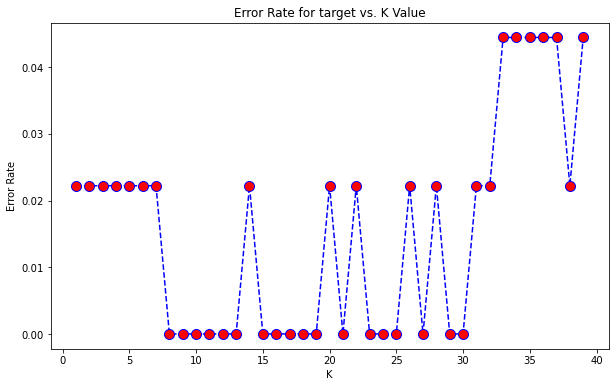

In [65]:
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 40), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate for target vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate')

In [66]:
# creating model for target 
# for h1n1_vaccine
model_knn = KNeighborsClassifier()
parameters_knn = {'algorithm':['auto'],
                  'leaf_size':[10,20,30],
                  'metric':['minkowski'],
                  'metric_params':[None],
                  'n_jobs':[1,3,5],
                  'n_neighbors':[5,10,15,20,25],
                  'p':[1,2],
                  'weights':['uniform']}
knn_grid_knn = GridSearchCV(model_knn,
                          parameters_knn,
                          cv = 2,
                          verbose=True)

##### 8.2. Fitting the Model

In [67]:
knn_grid_knn.fit(X_train,y_train)

Fitting 2 folds for each of 90 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    7.5s finished


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [10, 20, 30],
                         'metric': ['minkowski'], 'metric_params': [None],
                         'n_jobs': [1, 3, 5],
                         'n_neighbors': [5, 10, 15, 20, 25], 'p': [1, 2],
                         'weights': ['uniform']},
             verbose=True)

In [68]:
knn_grid_knn.best_score_

0.9239840348330914

In [69]:
knn_grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [70]:
model = KNeighborsClassifier(algorithm='auto',
                                  leaf_size=10,
                                  metric='minkowski',
                                  metric_params=None,
                                  n_jobs=1,
                                  n_neighbors=15,
                                  p=1,
                                  weights='uniform')

In [71]:
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9523809523809523

In [72]:
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

1.0

##### 8.3. PCA

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pd.DataFrame(pca.fit_transform(X))
iris_pca.head()

,0,1
0,-2.656803,-0.238520
1,-2.729723,-0.054315
2,-2.888516,0.102324
3,-2.753231,0.249559
4,-2.693263,-0.146417


In [74]:
iris_data.shape

(150, 4)

In [75]:
iris_pca.shape

(150, 2)

In [76]:
var=pca.explained_variance_ratio_
var

array([0.95814953, 0.03415414])

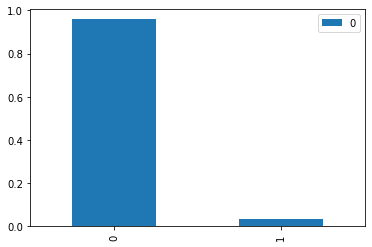

In [77]:
var1 = pd.DataFrame(var)
var1.plot(kind='bar')

In [78]:
dfX = iris_pca.iloc[:,:]
dfX.head(2)

,0,1
0,-2.656803,-0.238520
1,-2.729723,-0.054315


In [79]:
#for target
dfX_train, dfX_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [80]:
model_pca = KNeighborsClassifier(algorithm='auto',
                                  leaf_size=10,
                                  metric='minkowski',
                                  metric_params=None,
                                  n_jobs=1,
                                  n_neighbors=15,
                                  p=1,
                                  weights='uniform')

In [81]:
model_pca.fit(dfX_train,y_train)
model_pca.score(dfX_train,y_train)

0.9523809523809523

In [82]:
y_predict_pca = model_pca.predict(dfX_test)
accuracy_score(y_test,y_predict_pca)

1.0

Text(0, 0.5, 'Second Principal comaponent')

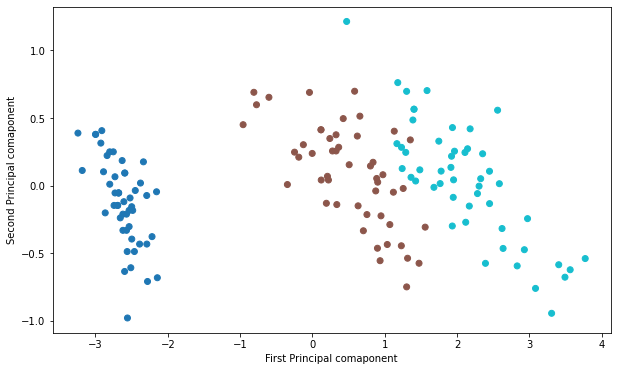

In [83]:
# graph
plt.figure(figsize=(10,6))
plt.scatter(x=dfX.iloc[:,0],
            y=dfX.iloc[:,1],
            c=iris_data['target'],
            cmap='tab10'
           )
plt.xlabel("First Principal comaponent")
plt.ylabel("Second Principal comaponent")

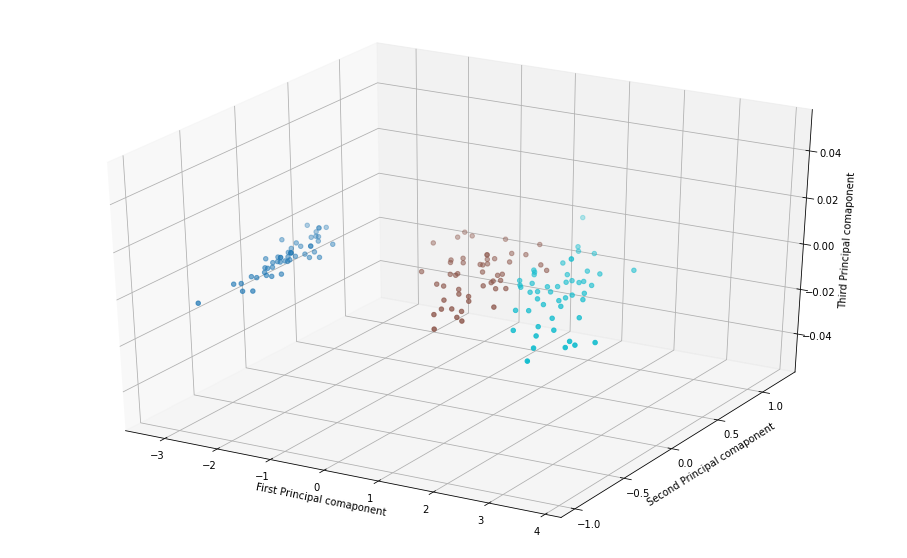

In [84]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dfX.iloc[:,0], 
    ys=dfX.iloc[:,1],  
    c=iris_data['target'],
    cmap='tab10'
)
ax.set_xlabel('First Principal comaponent')
ax.set_ylabel('Second Principal comaponent')
ax.set_zlabel('Third Principal comaponent')
plt.show()

### 9. Model Evaluation 

##### 9.1. Accuracy Score

In [85]:
# acuracy score
accuracy_score(y_test,y_predict_pca)

1.0

##### 9.2. Confusion Matrix

In [86]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict_pca)

Counter({1: 17, 2: 14, 0: 14})


col_0,0,1,2
target,,,
0,14,0,0
1,0,17,0
2,0,0,14


In [87]:
confusion_matrix(y_test,y_predict_pca)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]], dtype=int64)

##### 9.3. Error

In [88]:
# errrors
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test,y_predict_pca))
print(math.sqrt(mean_squared_error(y_test,y_predict_pca)))

0.0
0.0


##### 9.4. Precision

In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Precision 
print('Precision: %.3f' % precision_score(y_test,y_predict_pca, average = 'micro'))

Precision: 1.000


##### 9.5. Recall

In [90]:
# Recall 
print('Recall: %.3f' % recall_score(y_test,y_predict_pca, average = 'micro'))

Recall: 1.000


##### 9.6. F1 Score

In [91]:
# F1_score 
print('F1_score: %.3f' % f1_score(y_test,y_predict_pca, average = 'micro'))

F1_score: 1.000


##### 9.7. Evaluating Precision, recall,F1 score matrix

In [92]:
print(classification_report(y_test,y_predict_pca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



##### 9.8. Roc Auc Score & Curve

In [93]:
model.predict(X_test)

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1], dtype=int64)

In [94]:
model.predict_proba(X_test)

array([[0.        , 0.93333333, 0.06666667],
       [0.        , 0.06666667, 0.93333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.8       , 0.2       ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.8       , 0.2       ],
       [0.        , 0.13333333, 0.86666667],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.73333333, 0.26666667],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.

In [95]:
y_predict_th2 = np.where(model.predict_proba(X_test)[:,1]>0.2,1,0) # Threshold is 0.2
y_predict_th3 = np.where(model.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [96]:
pd.crosstab(y_test,y_predict_th4)

col_0,0,1
target,,
0,14,0
1,0,17
2,13,1


In [97]:
def predict_threshold (model,X_test,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [98]:
# thresholds
for thr in np.arange(0,1.1,0.1):
    y_predict = predict_threshold(model,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[14  0  0]
 [ 0 17  0]
 [ 7  7  0]]
Threshold : 0.1
[[14  0  0]
 [ 0 17  0]
 [ 8  6  0]]
Threshold : 0.2
[[14  0  0]
 [ 0 17  0]
 [13  1  0]]
Threshold : 0.30000000000000004
[[14  0  0]
 [ 0 17  0]
 [13  1  0]]
Threshold : 0.4
[[14  0  0]
 [ 0 17  0]
 [13  1  0]]
Threshold : 0.5
[[14  0  0]
 [ 0 17  0]
 [14  0  0]]
Threshold : 0.6000000000000001
[[14  0  0]
 [ 0 17  0]
 [14  0  0]]
Threshold : 0.7000000000000001
[[14  0  0]
 [ 2 15  0]
 [14  0  0]]
Threshold : 0.8
[[14  0  0]
 [ 6 11  0]
 [14  0  0]]
Threshold : 0.9
[[14  0  0]
 [ 6 11  0]
 [14  0  0]]
Threshold : 1.0
[[14  0  0]
 [17  0  0]
 [14  0  0]]


In [99]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.preprocessing import label_binarize
probs = model.predict_proba(X_test)
y_score = probs

In [100]:
y=label_binarize(y, classes=[0,1])
print(y)

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [101]:
fpr = {}
tpr = {}
threshold = {}
roc_auc_score = {}

In [102]:
for i in range(0,2):
    fpr[i], tpr[i],threshold[i] = roc_curve(y_test,y_score[:,i], pos_label=i)
    roc_auc_score = auc(fpr[i],tpr[i])

In [103]:
print(roc_auc_score)

1.0


In [104]:
fpr

{0: array([0., 0., 1.]),
 1: array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07142857, 0.21428571, 0.25      , 1.        ])}

In [105]:
tpr

{0: array([0., 1., 1.]),
 1: array([0.        , 0.47058824, 0.82352941, 0.88235294, 1.        ,
        1.        , 1.        , 1.        , 1.        ])}

In [106]:
threshold

{0: array([2., 1., 0.]),
 1: array([2.        , 1.        , 0.8       , 0.73333333, 0.66666667,
        0.2       , 0.13333333, 0.06666667, 0.        ])}

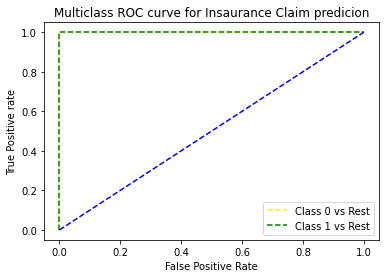

In [107]:
# plot of ROC curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='yellow', label='Class 0 vs Rest') 
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
#plt.plot(fpr[1], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Multiclass ROC curve for Insaurance Claim predicion') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.legend(loc='best') 
plt.savefig('Multiclass ROC',dpi=500);

##### Predicted Model

In [112]:
display(y_predict)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [113]:
y_test = pd.DataFrame(y_test, columns = ["target"])

In [114]:
y_test

,target
87,1
111,2
10,0
91,1
49,0
60,1
72,1
67,1
39,0
55,1


##### Saving Model to disk

In [108]:
import joblib

In [109]:
joblib.dump(model, "iris.pkl")

['iris.pkl']

##### Load model to compair result

In [110]:
model = joblib.load("iris.pkl")

In [111]:
print(model.predict([[5.1, 1.4, 0.2]]))

[0]
